In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the "Algerian Forest Fires" dataset
df = pd.read_csv(r"C:\Users\acer\Dropbox\PC\Downloads\Algerian_forest_fires_cleaned.csv")
df.head()

C:\Users\acer\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Data Cleaning

In [2]:
# checking for missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [3]:
# checking data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
# converting categorical columns to their appropriate data types
df['Classes'] = df['Classes'].astype('category')
df['Region'] = df['Region'].astype('category')

In [5]:
# checking for duplicate rows in the DataFrame
duplicates = df.duplicated().sum()
print(duplicates)

0


In [6]:
# counting records in each class
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
# stripping trailing spaces to remove the duplicates in "Classes" column
df['Classes'] = df['Classes'].str.strip()

In [8]:
# rechecking the records in "Classes" column
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [9]:
# implementing descriptive statistics on the dataset
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


The dataset exhibits notable variability, as indicated by the standard deviations: RH (14.83), FFMC (14.35), DMC (12.39), DC (47.66) and BUI (14.23). This variation suggests a wide distribution of values. 

Outliers may exist, particularly in Rain, where the maximum (16.80 mm) significantly exceeds the mean (0.76 mm). Similarly, the DC maximum (220.40) against a mean of 49.43 necessitates further investigation to assess their impact on overall trends.

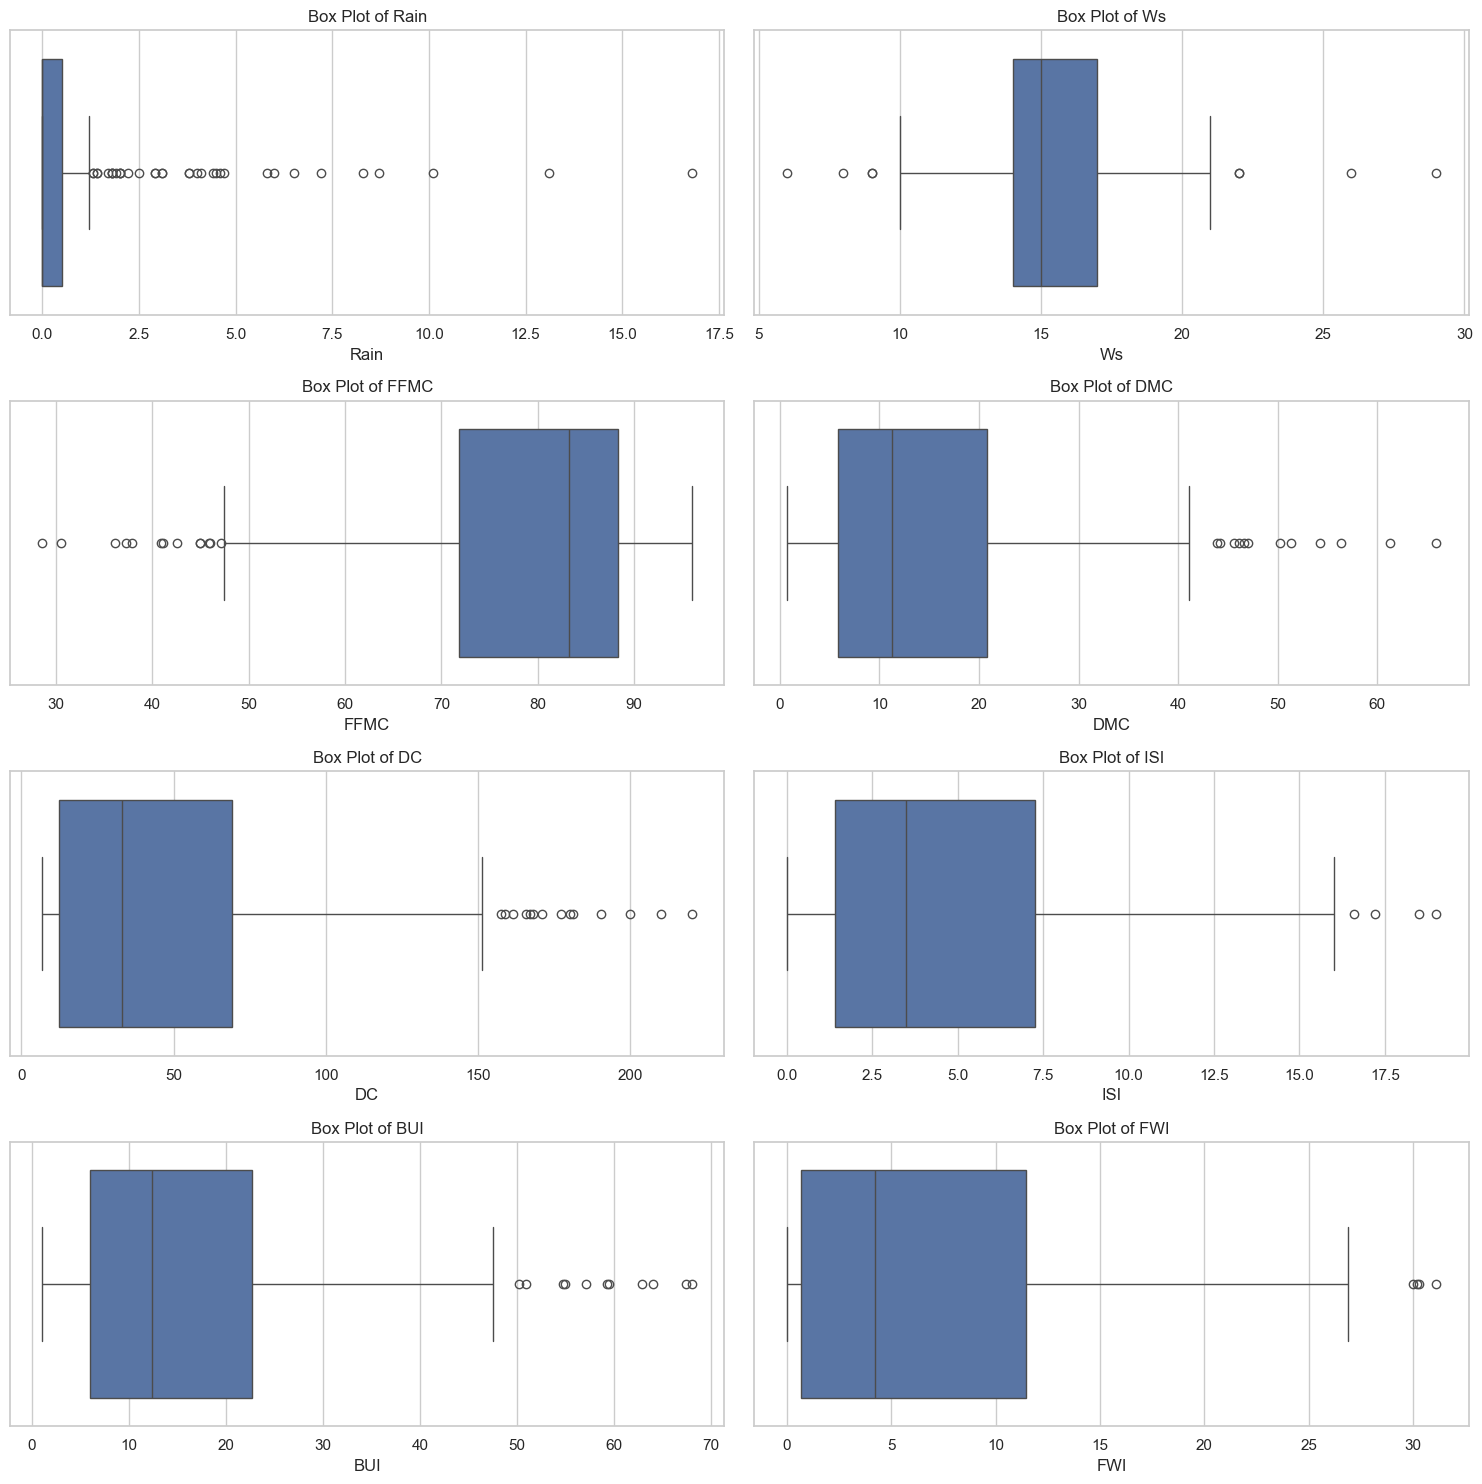

In [10]:
# importing the matplotlib and seaborn libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# setting the aesthetic style for seaborn plots
sns.set(style="whitegrid")

# List of columns to analyze
columns_to_analyze = ['Rain', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# creating box plots for each columns_to_analyze
plt.figure(figsize=(15, 15))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [11]:
# importing necessary libraries for skewness and kurtosis
from scipy.stats import skew, kurtosis

# function to get the distribution summary
def distribution_summary(df, columns):
    summary = {}
    for col in columns:
        summary[col] = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Standard Deviation': df[col].std(),
            'Skewness': skew(df[col]),
            'Kurtosis': kurtosis(df[col])
        }
    return pd.DataFrame(summary)

# specifying the columns to analyze
columns_to_analyze = ['Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
distribution_summary(df, columns_to_analyze)

,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Mean,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
Median,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
Standard Deviation,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
Skewness,0.552150,4.540380,-1.311967,1.513566,1.464349,1.133192,1.443762,1.140496
Kurtosis,2.543479,25.270112,0.994219,2.387582,1.539216,0.820094,1.891410,0.616995


As per this analysis, "FFMC" is left-skewed, while "Rain", "DMC", "DC", "ISI", "BUI", and "FWI" are right-skewed, indicating asymmetric distributions. The high kurtosis in "Rain" suggests heavy tails, meaning extreme values are more likely, while other columns show moderate kurtosis. This suggests potential outliers, especially in "Rain", "DMC", "DC", and "BUI", where skewness and high standard deviations indicate values deviating significantly from the mean.

In [12]:
# function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # filtering the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_analyze = ['Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# applying the IQR method
df = remove_outliers_iqr(df, columns_to_analyze)

In [13]:
# specifying the columns to analyze
columns_to_analyze = ['Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
distribution_summary(df, columns_to_analyze)

,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Mean,15.219355,0.085161,83.569677,14.113548,49.402581,5.137419,16.320000,7.189677
Median,15.000000,0.000000,85.400000,12.500000,38.300000,4.700000,14.200000,6.300000
Standard Deviation,2.294179,0.171621,6.321725,7.943887,34.424917,3.107577,9.476762,5.430388
Skewness,0.114903,2.311310,-1.000112,0.676570,1.103950,0.732918,0.776068,0.555646
Kurtosis,-0.519736,4.709636,0.521383,-0.225078,0.482535,-0.066454,-0.096040,-0.691520


After removing the outliers, the summary statistics show noticeable improvements. Skewness in most columns is closer to zero, indicating reduced asymmetry. However, "Rain" still has a high skewness (4.54), suggesting some extreme values may remain. The kurtosis in Rain (25.27) is still elevated. Overall, the data looks cleaner, with fewer extreme deviations.

In [14]:
# applying log transformation to the "Rain" columns
df['Rain'] = np.log1p(df['Rain'])   

## Feature Engineering

In [15]:
# creating a datetime column using the "year", "month" and "day" column
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [16]:
from sklearn.preprocessing import LabelEncoder

# creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# list of categorical columns to encode
categorical_columns = ['Classes', 'Region']

# applying label encoding
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0,2012-06-01
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0,2012-06-05
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,0,2012-06-06
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,0,2012-06-07
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0,0,2012-06-08


## Data Visualization

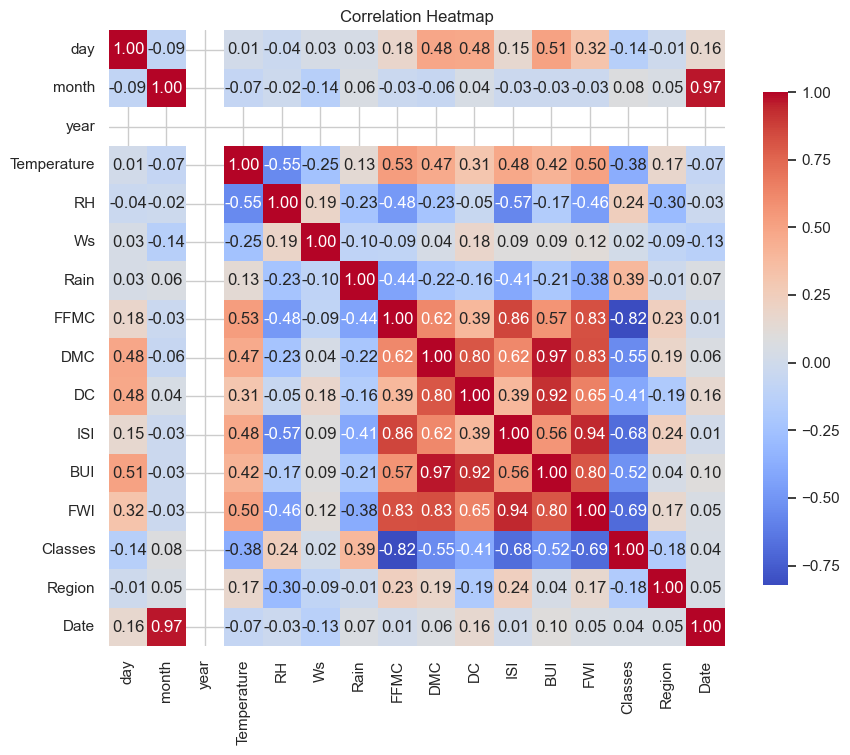

In [17]:
# calculating the correlation matrix
correlation_matrix = df.corr()

# plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

Notably, "FFMC" exhibits a strong positive correlation with "FWI" (0.83) and "ISI" (0.86), while DMC highly correlates with "FWI" (0.83), "BUI" (0.97), "DC" (0.80). The heatmap aids in identifying relationships and potential multicollinearity among features for further analysis.

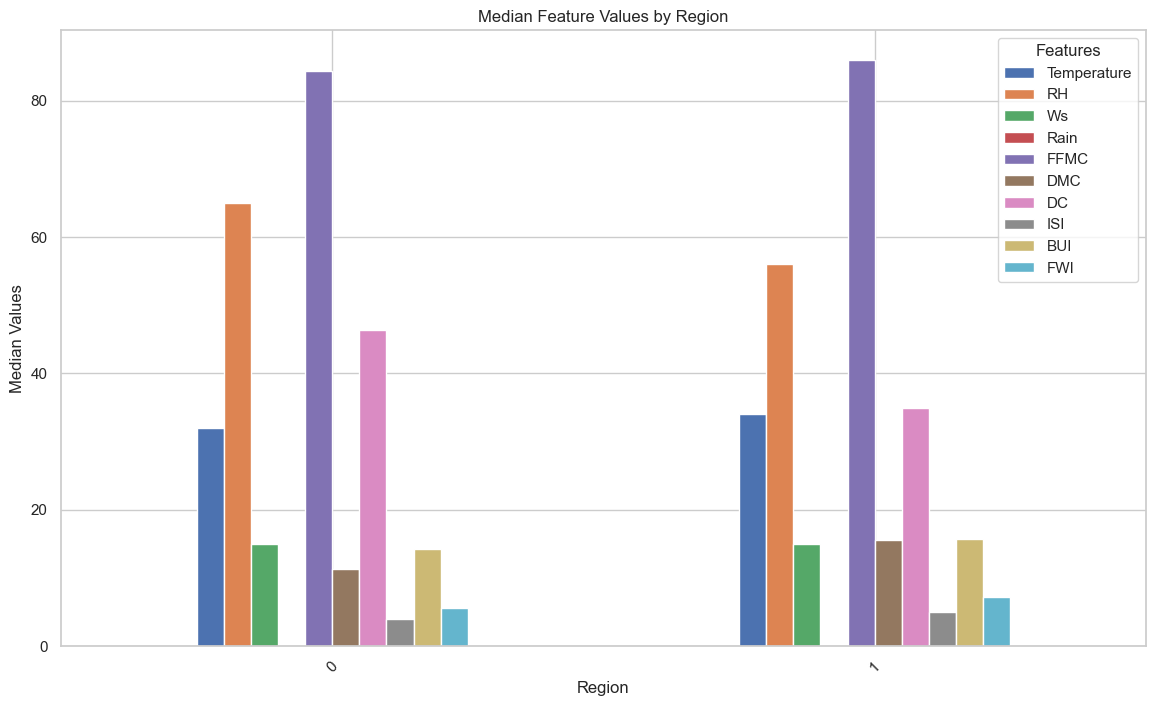

In [18]:
# list of columns to analyze
columns_of_interest = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

# grouping the data by 'Region' and calculating the median for each feature
grouped_data = df[columns_of_interest].groupby('Region').median()

# plotting the median feature values for each region using a bar chart
grouped_data.plot(kind='bar', figsize=(14, 8))
plt.title('Median Feature Values by Region')
plt.ylabel('Median Values')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Features')
plt.show()

The bar chart illustrates the average values of various environmental features across different regions. Each region is represented on the x-axis, while the y-axis displays the average feature values.

Notably, the regions show significant variations in median values, with some features, like RH, DMC, and DC indicates diverse environmental conditions in the regions.

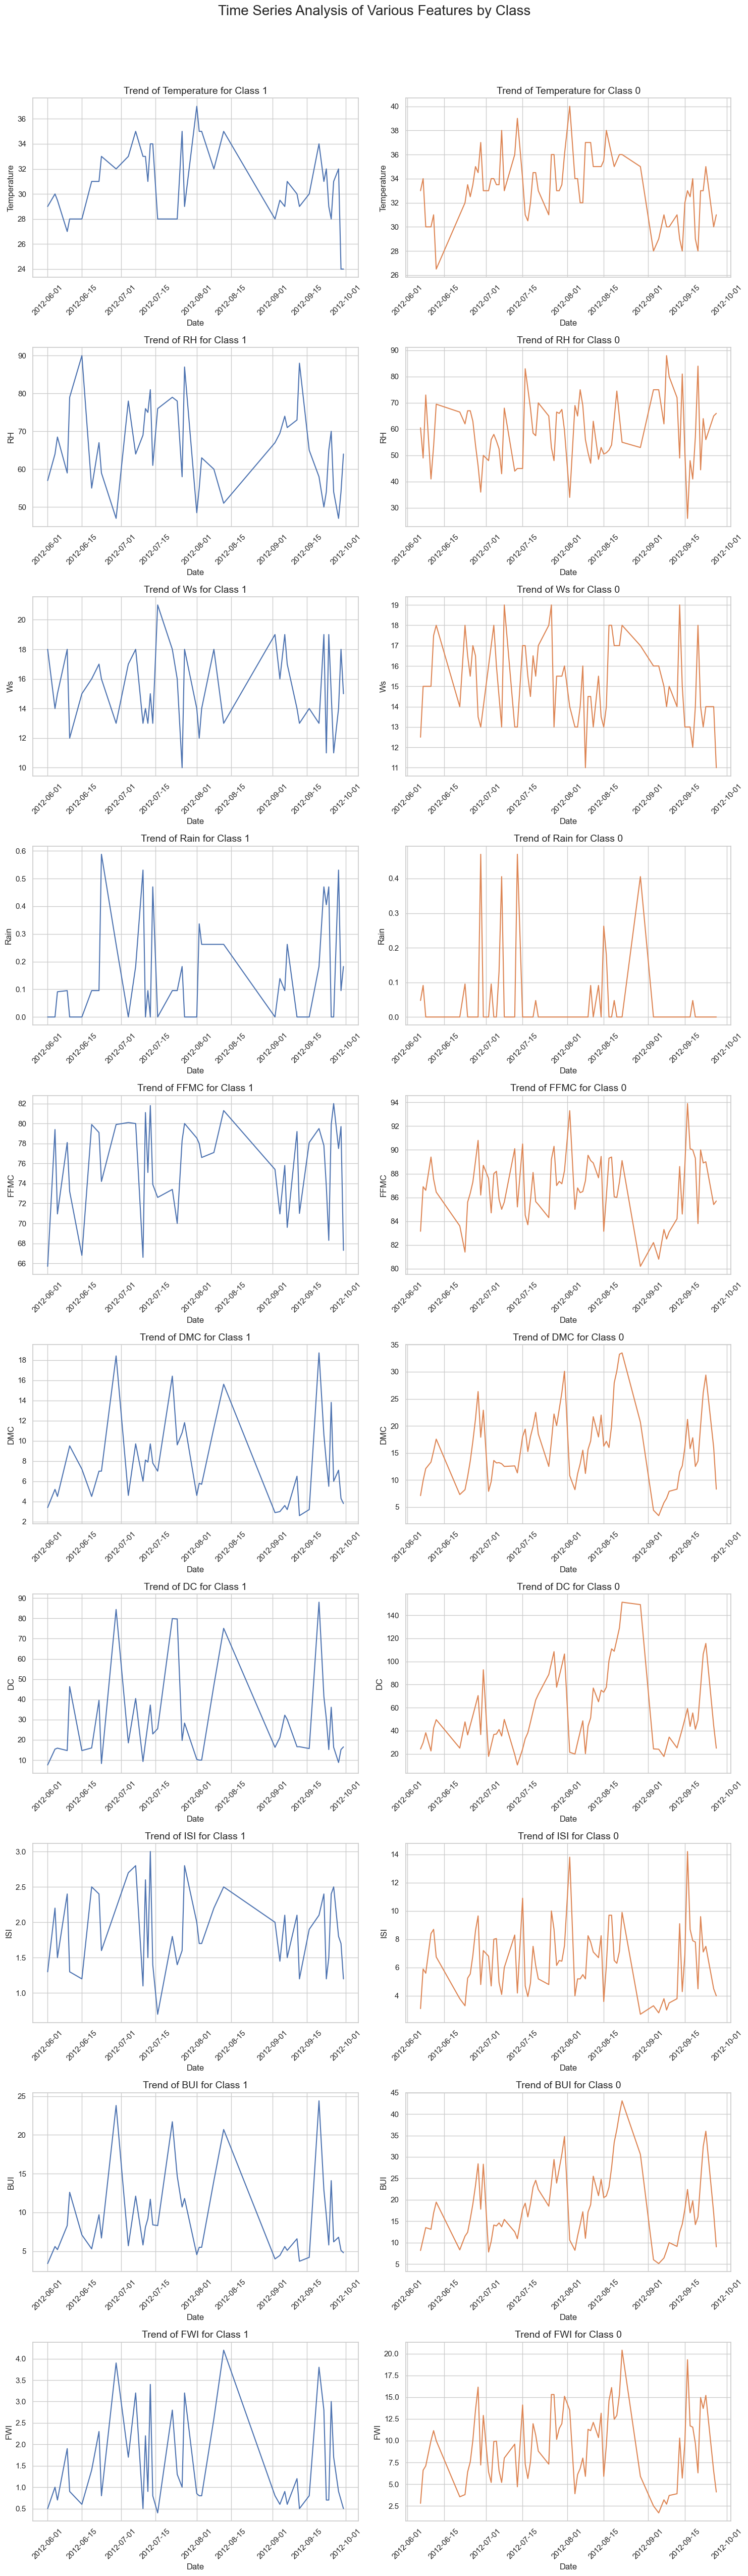

In [19]:
# setting the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(15, 50))

# list of features to plot
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# extracting unique classes in the dataset
classes = df['Classes'].unique()

# conducting time-series analysis on each feature wrt class
for i, feature in enumerate(features):
    
    for j, class_label in enumerate(classes):
        class_data = df[df['Classes'] == class_label]
        plt.subplot(len(features), len(classes), i * len(classes) + j + 1)
        sns.lineplot(data=class_data, x='Date', y=feature, ci=None, color=sns.color_palette()[j % 10], linestyle='-')
        plt.title(f'Trend of {feature} for Class {class_label}', fontsize=14)
        plt.ylabel(feature, fontsize=12)
        plt.xlabel('Date', fontsize=12)
        plt.xticks(rotation=45)

# adding a title to the entire figure
plt.suptitle('Time Series Analysis of Various Features by Class', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

With respect to Temperature, Class 1 shows more fluctuations with a temperature range between 32°C and 36°C, whereas Class 0 has higher temperature peaks, with values reaching around 38°C while having more consistent variation.

Similarly, Class 1 depicts lower Wind Speeds, Duff Moisture Code, Drought Code, Build-Up Index and Fire Weather Index, and wider variability in Relative Humidity and Fine Fuel Moisture Code. However, Class 0 exhibited higher and comparatively stable trends.

But, Class 1 has several rain events (peaks above 0.4 units) while Class 0 experiences fewer rain events (values close to 0).

## Feature Selection

In [20]:
# dropping highly correlated columns from the DataFrame to avoid redundancy
columns_to_drop = ['DC', 'BUI', 'FWI', 'FFMC']
df_dropped = df.drop(columns=columns_to_drop)

df_dropped.head()

,day,month,year,Temperature,RH,Ws,Rain,DMC,ISI,Classes,Region,Date
0,1,6,2012,29,57,18,0.0,3.4,1.3,1,0,2012-06-01
4,5,6,2012,27,77,16,0.0,3.0,1.2,1,0,2012-06-05
5,6,6,2012,31,67,14,0.0,5.8,3.1,0,0,2012-06-06
6,7,6,2012,33,54,13,0.0,9.9,6.4,0,0,2012-06-07
7,8,6,2012,30,73,15,0.0,12.1,5.6,0,0,2012-06-08


In [21]:
# dropping the 'Date' column
df = df_dropped.drop(columns='Date')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,DMC,ISI,Classes,Region
0,1,6,2012,29,57,18,0.0,3.4,1.3,1,0
4,5,6,2012,27,77,16,0.0,3.0,1.2,1,0
5,6,6,2012,31,67,14,0.0,5.8,3.1,0,0
6,7,6,2012,33,54,13,0.0,9.9,6.4,0,0
7,8,6,2012,30,73,15,0.0,12.1,5.6,0,0


In [22]:
from sklearn.ensemble import RandomForestClassifier

# selecting features and target variable
X = df.drop(columns=['Classes'])
y = df['Classes']

# fitting a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# getting feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
8          ISI    0.553418
7          DMC    0.212107
6         Rain    0.066912
3  Temperature    0.048558
4           RH    0.041179
0          day    0.031245
5           Ws    0.021344
1        month    0.015116
9       Region    0.010121
2         year    0.000000


In [23]:
# dropping less important features
low_importance_features = ['year', 'Region', 'month']
df = df.drop(columns=low_importance_features)

## Model Building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

# separating "Classes": the target variable from the dataset
X = df.drop(columns=['Classes'])
y = df['Classes']

# implementing the test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing the dataset after test-train split to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# function to evaluate model performance
def evaluate_model(y_true, y_pred, y_prob):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_prob[:, 1])
    
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# intializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# making predictions using the trained model
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)

# Evaluating the model
print("Normal Logistic Regression:")
evaluate_model(y_test, y_pred, y_proba)

Normal Logistic Regression:
MAE: 0.1290
MSE: 0.1290
RMSE: 0.3592
R² Score: 0.4364
Accuracy: 0.8710
Precision: 0.7692
Recall: 0.9091
AUC-ROC: 0.9773


### Ridge Logistic Regression

In [28]:
# initializing Ridge Logistic Regression
ridge_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
ridge_reg.fit(X_train_scaled, y_train)

# making predictions using the trained model
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_proba_ridge = ridge_reg.predict_proba(X_test_scaled)

# Evaluating the model
print("Ridge Logistic Regression:")
evaluate_model(y_test, y_pred_ridge, y_proba_ridge)

Ridge Logistic Regression:
MAE: 0.1290
MSE: 0.1290
RMSE: 0.3592
R² Score: 0.4364
Accuracy: 0.8710
Precision: 0.7692
Recall: 0.9091
AUC-ROC: 0.9773


### Lasso Logistic Regression

In [29]:
# initializing Lasso Logistic Regression
lasso_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
lasso_reg.fit(X_train_scaled, y_train)

# making predictions using the trained model
y_pred_lasso = lasso_reg.predict(X_test_scaled)
y_proba_lasso = lasso_reg.predict_proba(X_test_scaled)

# Evaluating the model
print("Lasso Logistic Regression:")
evaluate_model(y_test, y_pred_lasso, y_proba_lasso)

Lasso Logistic Regression:
MAE: 0.0323
MSE: 0.0323
RMSE: 0.1796
R² Score: 0.8591
Accuracy: 0.9677
Precision: 0.9167
Recall: 1.0000
AUC-ROC: 0.9955


### ElasticNet Logistic Regression

In [30]:
# initializing ElasticNet Logistic Regression
elasticnet_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
elasticnet_reg.fit(X_train_scaled, y_train)

# making predictions using the trained model
y_pred_elasticnet = elasticnet_reg.predict(X_test_scaled)
y_proba_elasticnet = elasticnet_reg.predict_proba(X_test_scaled)

# Evaluating the model
print("ElasticNet Logistic Regression:")
evaluate_model(y_test, y_pred_elasticnet, y_proba_elasticnet)

ElasticNet Logistic Regression:
MAE: 0.0968
MSE: 0.0968
RMSE: 0.3111
R² Score: 0.5773
Accuracy: 0.9032
Precision: 0.7857
Recall: 1.0000
AUC-ROC: 0.9909


Here, the Lasso Logistic Regression model is the best among the four models due to its superior performance metrics. It has the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating better predictive accuracy. The Root Mean Squared Error (RMSE) is also the lowest at 0.1429, while its R² Score of 0.9175 shows that it explains a higher proportion of variance in the target variable. Additionally, the AUC-ROC Score of 0.9983 indicates exceptional discrimination ability.

In [31]:
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning for Lasso Logistic Regression using GridSearchCV
print("Hyperparameter Tuning for Lasso Logistic Regression:")
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Inverse of regularization strength
    'solver': ['saga'],             # Use 'saga' for L1 penalty
}

# performing grid search on Lasso Logistic Regression
grid_search = GridSearchCV(LogisticRegression(penalty='l1', max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# printing best parameters
print("Best Parameters:", grid_search.best_params_)
best_lasso_model = grid_search.best_estimator_

# evaluating the best model on the test set
y_pred_best_lasso = best_lasso_model.predict(X_test_scaled)
y_prob_best_lasso = best_lasso_model.predict_proba(X_test_scaled)

# evaluating the best Lasso model
evaluate_model(y_test, y_pred_best_lasso, y_prob_best_lasso)

Hyperparameter Tuning for Lasso Logistic Regression:
Best Parameters: {'C': 0.1, 'solver': 'saga'}
MAE: 0.0323
MSE: 0.0323
RMSE: 0.1796
R² Score: 0.8591
Accuracy: 0.9677
Precision: 0.9167
Recall: 1.0000
AUC-ROC: 0.9955


Even after performing Grid Search CV, the evaluating parameters didn't change indicating no performance.

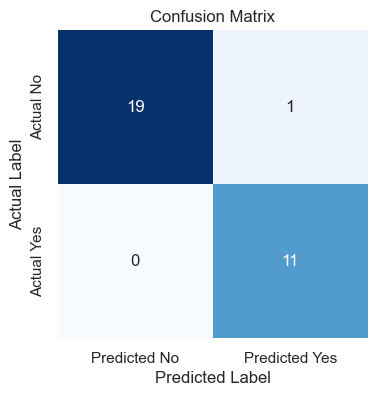

In [35]:
from sklearn.metrics import confusion_matrix

# function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

# plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred_best_lasso)

In [36]:
# feature importance as per (best) Lasso logistic regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lasso_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

# printing feature importance
print("Feature Importance:")
print(feature_importance)

Feature Importance:
       Feature  Importance
0          day    0.000000
1  Temperature    0.000000
2           RH    0.000000
3           Ws    0.000000
4         Rain    0.000000
5          DMC   -0.059974
6          ISI   -1.963197


Based on the feature importance values derived from the best Lasso logistic regression model:
1. Features such as day, Temperature, RH, Ws, and Rain have an importance score of 0.000000, indicating that these variables do not contribute to the model's predictive power. The model has effectively disregarded them during the training process.
2. The features DMC and ISI have negative importance scores of -0.059974 and -1.963197, respectively, implying that as the values of these features increases, the likelihood of the positive class decreases.

**Implications:**
The model suggests that DMC (Drought Management Class) and ISI (Initial Spread Index) are important factors influencing the outcome, while other features may not play a meaningful role in predicting the target variable. This finding can help in feature selection for further modeling or simplifying the model by focusing on significant predictors.

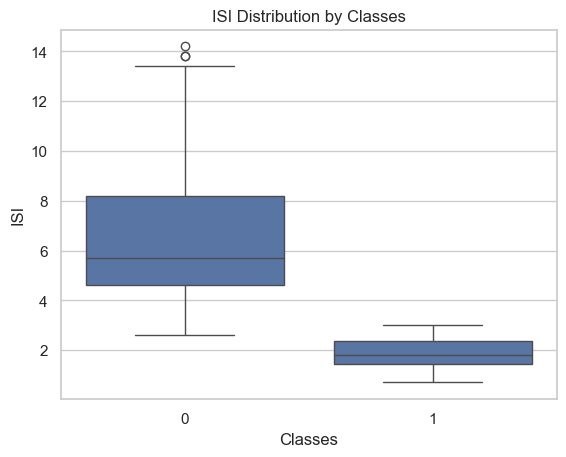

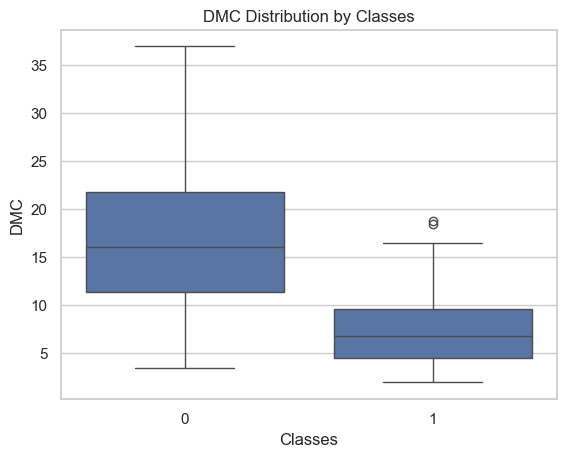

In [40]:
# investigating DMC and ISI influence via looking into data distribution
# Box plot for ISI vs Classes
sns.boxplot(x='Classes', y='ISI', data=df)
plt.title('ISI Distribution by Classes')
plt.show()

# Box plot for DMC vs Classes
sns.boxplot(x='Classes', y='DMC', data=df) 
plt.title('DMC Distribution by Classes')
plt.show()

Clearly, the plots suggest that Class 1 has low "ISI" and "DMC" when compared with Class 0. Due to their varied data distribution among Class 0 and Class 1, the parameters contributed significant towards model predictions.